# Goal: Solve Chua Circuit System of Equations using Runge-Kutta Methods 


In [2]:
# will use set of dimensionless equations foudn from paper in this link 


\begin{align}
\dot{I_3} & = \frac{-1}{L} V_2\\
\dot{V_2} & = \frac{1}{C_2}I_3 - \frac{G}{C_2}V_2 -\frac{G}{C_2}V_1\\
\dot{V_1} & = \frac{G}{C_2} - \frac{1}{C_1}f(V_1)\\
\end{align}

NOT SURE WHAT F(V1) SUPPOSED TO REPRESENT: 

The literature had it as a piecewise function that had various definitions depending on the paper i read. Given my lack of familiarlity with the subject and the time i was investing on just getting a grip on the physics i thought it best to try applying my work to the Dripping Faucet Problem 

where 
 \begin{align} 
 \f(V_1) & = \begin{cases} 

# GOAL: Solve motion ODE for Dripping Faucet Using Runge-Kutta Methods



In [308]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [309]:
y_0 = np.array([1.]) # Initial condition

In [312]:
def RungeKutta4(func, y_0, x, args={}):
    """ Classical Runge-Kutta (RK4) approximation to a first-order ODE system
    with initial conditions.

    Args:
        func: (callable) The first-order ODE system to be approximated.
        y_0:  (array)    The initial condition.
        x:    (array)    A sequence of time points for which to solve for y.
        args: (dict)     Extra arguments to pass to function.

    Out:
        y:    (array)    The approximated solution of the system at each time in t,
                         with the initial value y_0 in the first row.
    """

    # Initialise the approximation array
    y = np.zeros([len(x), len(y_0)])
    y[0] = y_0

    # Loop through the time steps, approximating this step from the prev step
    for i, x_i in enumerate(x[:-1]):

        h   = x[i+1] - x_i # size of the step

        k_1 = h*func(x_i, y[i], args)
        k_2 = h*func(x_i + h/2. , y[i] + k_1/2., args)
        k_3 = h*func(x_i + h/2. , y[i] + k_2/2., args)
        k_4 = h*func(x_i + h    , y[i] + k_3, args)

        y[i+1] = y[i] + 1/6.*(k_1 + 2.*k_2 + 2.*k_3 + k_4) # RK4 step

    return y

The Equation Of Motion that describes this system when mass is constant is given by
\begin{align}
\ddot{x} & = \frac{-k}{m} x -\frac{\gamma}{m} \dot{x} + g\\
\end{align}

we now simplify variables in the case of a constant mass (no chaotic behavior in this case)  

\begin{align} 
\frac{\gamma}{m} & = \xi \\
\frac{k}{m} & = \nu \\
\end{align}

So the equation becomes 

\begin{align}
\ddot{x} & = -\nu x -\xi \dot{x} + g\\
\end{align}

using folllowing substitutions in order to create two coupled ODES (NB: Not sure if this step is valid?) 
\begin{align} 
y_0 & = x \\
y_1 & = \dot{x} \\
y_2 & = \ddot{x} \\
\end{align}
We then Obtain the coupled ODE's 
\begin{align} 
y_0 ' & = y_1 \\
y_1 ' & = -\nu y_0 -\xi y_1 + g\\
\end{align}

In [6]:
#NEXT STEP: SPLIT UP INTO TWO EQUATIONS AND RUN RK4 

In [294]:
def DropOscillator(t, y, args):
    """ A damped and forced Oscillating Droplet, described as set of two first-order ODEs.

    Args:
        m : for this first step I will assume a constant mass to make the problem slighly easier, threshold will be set later 
        t: Time
        y: Pendulum system vector [position,  velocity] 
        args['nu']: spring_const/mass
        args['xi']: viscous damping/ mass 
        args['g']: gravitational const. 

    Returns:
        dydt: ODE vector
    """

    dydt = np.zeros(2)

    dydt[0] = y[1] #unclear as to hwo this step works 
    dydt[1] = (-args['nu']*y[0] - args['xi']*y[1] + args['g']) 

    return dydt

We now define Parameters 

In [295]:
gravity_acc       = 10. # [m /s2]
mass    = 0.001 #  test mass in [kg]
damping_parameter = 0.00089 # viscosity of water @ room temperature [ kg /m^2]
spring_const = 0.1 # arbitrary spring const. not sure what this would be in reality 

N = 10000
t = np.linspace(0., 10., N+1) # [s] an array of time steps
print(t)
len(t)

[0.000e+00 1.000e-03 2.000e-03 ... 9.998e+00 9.999e+00 1.000e+01]


10001

In [314]:
solve_args          = {}
solve_args['nu'] = spring_const/mass
solve_args['xi']  = damping_parameter/mass
solve_args['g'] = gravity_acc

initial_pos    = 0. # [m]
initial_vel = 0.1   # [m /s]
initial_cond    = np.array([initial_pos, initial_vel])

In [297]:
y = RungeKutta4(DropOscillator, initial_cond, t, solve_args)
print(y)

[[ 0.00000000e+00  1.00000000e-01]
 [ 1.04952323e-04  1.09901427e-01]
 [ 2.19796257e-04  1.19783061e-01]
 ...
 [ 9.90301651e-02 -6.11903411e-03]
 [ 9.90240974e-02 -6.01634610e-03]
 [ 9.90181326e-02 -5.91314807e-03]]


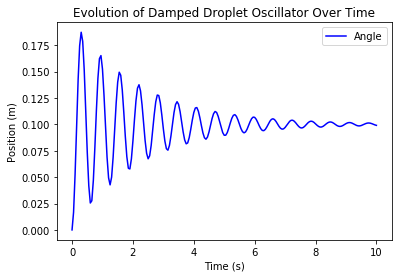

In [315]:
from scipy.integrate import odeint

#\solved = odeint(DropOscillator, initial_cond, t, args=(solve_args,))

# Solve Pendulum ODE with RK2 or RK4
y = RungeKutta4(DropOscillator, initial_cond, t, solve_args)

plt.plot(t, y[:,0], c='b', label='Angle')
#plt.plot(t, solved, 'r--', label='Small angle approx.')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Evolution of Damped Droplet Oscillator Over Time')
plt.legend(loc=1)
plt.show()

In [ ]:
# for mass = 0.001kg? any lower than that and graph that seems wrong appears, we would need a very small kg to get mass of drop correct however 


At this point we want to include the fact that the mass is continually increasing 

The Equation Of Motion that describes this system when mass is constant is given by
\begin{align}
\ddot{x} & = \frac{-k}{m} x -\frac{\gamma}{m} \dot{x} + g\\
\end{align}


The Equation Of Motion that describes this system when mass is constant is given by
\begin{align}
\ddot{x} & = \frac{-k}{m(t)} x -\frac{(\gamma +R)}{m(t)} \dot{x} + g\\
\end{align}

where R is the rate of change of the mass 

Expanding the function m(t) and plugging this into the equation 

\begin{align}
\ddot{x} & = \frac{-k}{m_0 + Rt} x -\frac{(\gamma +R)}{m_0 + Rt} \dot{x} + g\\
\end{align}

Where m_0 is some initial mass

Applying the intial method from above we obtain the two coupled ODE's* 

\begin{align} 
y_0 & = x \\
y_1 & = \dot{x} \\
y_2 & = \ddot{x} \\
\end{align}

We call the sum gamma + R the variable capital gamma

\begin{align} 
y_0 ' & = y_1 \\
y_1 ' & = \frac{-k}{m_0 + Rt} x -\frac{\Gamma}{m_0 + Rt} \dot{x} + g\\
\end{align}

In [281]:
def VariableMass_Oscillator(t, y, args):
    """ A damped and forced Oscillating Droplet, described as set of two first-order ODEs.

    Args:
        m : mass equal to m_0 + Rt where R is some constant rate  
        t: Time
        y: Pendulum system vector [position,  velocity] 
        args['ka']: spring_const
        args['m_0']: initial mass
        args['gamma']: viscous damping
        args['R']: Rate of mass change 
        args['capital gamma']: gamma + R 
        args['g']: gravitational const. 

    Returns:
        dydt: ODE vector
    """

    dzdt = np.zeros(2)

    dzdt[0] = y[1]
    dzdt[1] = (((-args['k'])/(args['m_0'] + args['R']*t))*y[0] - ((args['capital gamma'])/((args['m_0'] + args['R']*t)))*y[1] + args['g']) 

    return dzdt

In [325]:
gravity_acc       = 10. # [m /s2]
mass    = 0.001 #  test mass in [kg]
damping_parameter = 0.00089 # viscosity of water @ room temperature [ kg /m^2]
spring_const = 0.1 # arbitrary spring const. not sure what this would be in reality 
R = 0.0001 
m_0 = 0.001 
delta_m= 0.001
x_c = 1

N = 200
t = np.linspace(0., 10., N+1) # [s] an array of time steps

In [326]:
solve_args = {}
solve_args['k'] = spring_const
solve_args['m_0']  = m_0
solve_args['g'] = gravity_acc
solve_args['capital gamma'] = R + damping_parameter 
solve_args['R'] = R
solve_args['m_0']  = m_0

initial_pos    = 0. # [m]
initial_vel = 0.1   # [m /s]
initial_cond    = np.array([initial_pos, initial_vel])

In [327]:
y2 = RungeKutta4(VariableMass_Oscillator, initial_cond, t, solve_args)
#print(y2) 

TypeError: RungeKutta4() missing 1 required positional argument: 'delta_m'

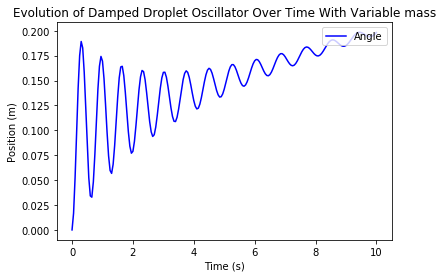

In [203]:
plt.plot(t, y2[:,0], c='b', label='Angle')
#plt.plot(t, solved, 'r--', label='Small angle approx.')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Evolution of Damped Droplet Oscillator Over Time With Variable mass')
plt.legend(loc=1)
plt.show()

Now, given the paper written by R.Shaw on the subject, the next step would be to determine some cut off position x_c where the  a part of the mass delta m is ejected and the process starts anew with a new m_0. For my own personal benefit I would also like to go over the rk4 algorithm used as there were some steps I wasnt 100% sure I understood completley and I might consider writing my own function. Since changing topics though I found I was able to better focus on the computational and mathematical  aspects of the problem rather than the complicated physics. 

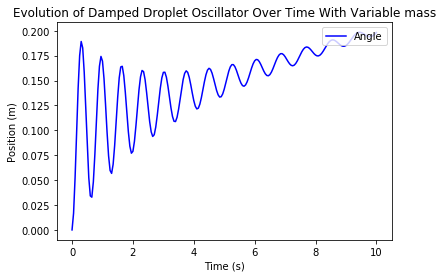

In [204]:
plt.plot(t, y3[:,0], c='b', label='Angle')
#plt.plot(t, solved, 'r--', label='Small angle approx.')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Evolution of Damped Droplet Oscillator Over Time With Variable mass')
plt.legend(loc=1)
plt.show()

In [303]:
def RungeKutta4_Drop(func, y_0, x, x_c,delta_m, args={}):
    """ Classical Runge-Kutta (RK4) approximation to a first-order ODE system
    with initial conditions.

    Args:
        func: (callable) The first-order ODE system to be approximated.
        y_0:  (array)    The initial condition.
        x:    (array)    A sequence of time points for which to solve for y.
        args: (dict)     Extra arguments to pass to function.

    Out:
        y:    (array)    The approximated solution of the system at each time in t,
                         with the initial value y_0 in the first row.
    """

    # Initialise the approximation array
    y = np.zeros([len(x), len(y_0)])
    #print(y.shape)
    #drop_times = np.zeros([len(x)])
    y[0] = y_0

    # Loop through the time steps, approximating this step from the prev step
    for i, x_i in enumerate(x[:-1]):
        change = 0
        h   = x[i+1] - x_i # size of the step

        k_1 = h*func(x_i, y[i],change, args)
        k_2 = h*func(x_i + h/2. , y[i] + k_1/2., change, args)
        k_3 = h*func(x_i + h/2. , y[i] + k_2/2.,change,  args)
        k_4 = h*func(x_i + h    , y[i] + k_3,change, args)

        y[i+1] = y[i] + 1/6.*(k_1 + 2.*k_2 + 2.*k_3 + k_4) # RK4 step
        
        if y[i+1,0] < x_c: 
            print('no change')
            continue 
        elif y[i+1,0] >= x_c: 
            #for j in range(len(drop_times)): 
                #drop_times[j] = x[i+1]
            print('change')
            change = delta_m 
            h   = x[i+1] - x_i # size of the step
            
            k_1 = h*func(x_i, y[i],change, args)
            k_2 = h*func(x_i + h/2. , y[i] + k_1/2., change, args)
            k_3 = h*func(x_i + h/2. , y[i] + k_2/2.,change,  args)
            k_4 = h*func(x_i + h    , y[i] + k_3,change, args)
            
            y[i+1] = y[i] + 1/6.*(k_1 + 2.*k_2 + 2.*k_3 + k_4) # RK4 step
            continue 
        #drop_times = np.delete(drop_times,0)
            

    return y

In [304]:
def VariableMass_Oscillator_Drop(t, y,x_c,delta_m,args = {}):
    """ A damped and forced Oscillating Droplet, described as set of two first-order ODEs.

    Args:
        m : mass equal to m_0 + Rt where R is some constant rate  
        t: Time
        y: Pendulum system vector [position,  velocity] 
        args['ka']: spring_const
        args['m_0']: initial mass
        args['gamma']: viscous damping
        args['R']: Rate of mass change 
        args['capital gamma']: gamma + R 
        args['g']: gravitational const. 

    Returns:
        dzdt: ODE vector
    """

    dzdt = np.zeros(2)

    dzdt[0] = y[1]
    if y[0] < x_c: 
        dzdt[1] = (((-args['k'])/(args['m_0'] + args['R']*t - delta_m))*y[0] - ((args['capital gamma'])/((args['m_0'] + args['R']*t - delta_m)))*y[1] + args['g']) 
    elif y[0] >= x_c: 
        dzdt[1] = (((-args['k'])/(args['m_0'] + args['R']*t))*y[0] - ((args['capital gamma'])/((args['m_0'] + args['R']*t)))*y[1] + args['g']) 
    return dzdt

In [305]:
gravity_acc       = 10. # [m /s2]
damping_parameter = 0.00089 # viscosity of water @ room temperature [ kg /m^2]
spring_const = 0.1 # arbitrary spring const. not sure what this would be in reality 
R = 0.0001 
m_0 = 0.01 
delta_m= 0.1
x_c = 0.200

N = 200
t = np.linspace(0., 10., N+1) # [s] an array of time steps

In [323]:
solve_args          = {}
solve_args['k'] = spring_const
solve_args['m_0']  = m_0
solve_args['g'] = gravity_acc
solve_args['capital gamma'] = R + damping_parameter 
solve_args['R'] = R
solve_args['m_0']  = m_0

initial_pos    = 0. # [m]
initial_vel = 0.01   # [m /s]
initial_cond    = np.array([initial_pos, initial_vel])

In [310]:
y4,times= RungeKutta4_Drop(VariableMass_Oscillator_Drop, initial_cond, t,x_c,delta_m, solve_args)
print(t)
print(times)
#times coming at 10 for some reason when the 

KeyError: 'k'

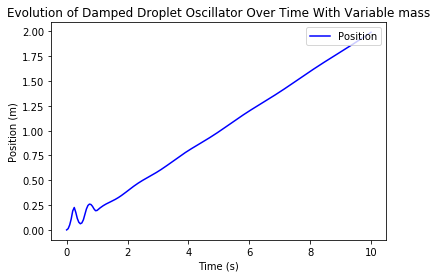

In [268]:
plt.plot(t, y4[:,0], c='b', label='Position')
#plt.plot(t, 0.1*y4[:,1], c='r', label='Angle')
#plt.plot(t, solved, 'r--', label='Small angle approx.')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Evolution of Damped Droplet Oscillator Over Time With Variable mass')
plt.legend(loc=1)
plt.show()

In [254]:
def mass_of_drop(t, delta_m, args={}): 
    mass = (args['m_0'] + args['R']*t - delta_m)
    
    return mass 
                 

In [256]:
change_in_mass = mass_of_drop(t, delta_m, solve_args)

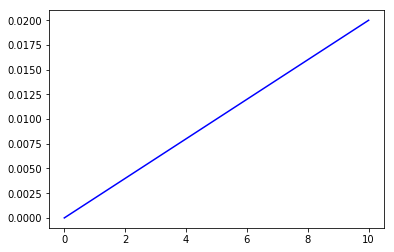

In [257]:
plt.plot(t, change_in_mass, c='b', label='Position')

In [319]:
def RungeKutta4(func, y_0, x,x_c,delta_m, args={}):
    """ Classical Runge-Kutta (RK4) approximation to a first-order ODE system
    with initial conditions.

    Args:
        func: (callable) The first-order ODE system to be approximated.
        y_0:  (array)    The initial condition.
        x:    (array)    A sequence of time points for which to solve for y.
        args: (dict)     Extra arguments to pass to function.

    Out:
        y:    (array)    The approximated solution of the system at each time in t,
                         with the initial value y_0 in the first row.
    """

    # Initialise the approximation array
    y = np.zeros([len(x), len(y_0)])
    y[0] = y_0

    # Loop through the time steps, approximating this step from the prev step
    for i, x_i in enumerate(x[:-1]):

        h   = x[i+1] - x_i # size of the step

        k_1 = h*func(x_i, y[i], delta_m, args)
        k_2 = h*func(x_i + h/2. , y[i] + k_1/2.,x_c,delta_m, args)
        k_3 = h*func(x_i + h/2. , y[i] + k_2/2.,x_c,delta_m, args)
        k_4 = h*func(x_i + h    , y[i] + k_3,x_c,delta_m, args)

        y[i+1] = y[i] + 1/6.*(k_1 + 2.*k_2 + 2.*k_3 + k_4) # RK4 step

    return y

In [322]:
y5 = RungeKutta4(VariableMass_Oscillator_Drop, initial_cond, t, x_c,delta_m,solve_args)

KeyError: 'k'

In [163]:


#plot mass v time 
#for some reason periodic again!? 
#times coming out at periodic intervals as well, didnt seem super chaotic even when it wasnt as simplisti as before 
